In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import os
os.getcwd()

'/Users/guoda/CodeAcademy 2021-2022/Studies Material/PRACTICE in Python(2022-01-27--)/2022W18_ProjectWorkSpaceshipTitanic/Project/JupyterNotebook'

In [2]:
# from IPython.display import IFrame
# IFrame(src='https://www.kaggle.com/c/spaceship-titanic', width=1500, height=800)

# **Introduction**


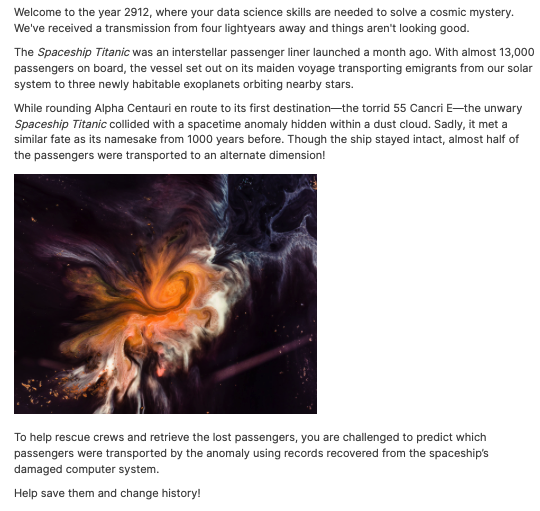

In [3]:
from IPython.display import Image
Image("pics/KaggleSpashipTitanic.png")

This kernel was inspired in part by the work of [SarahG](https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python)'s analysis that I thank very much for the quality of her analysis. This work represents a deeper analysis by playing on several parameters while using only logistic regression estimator. In a future work, I will discuss other techniques. I am open to any criticism and proposal. You do not hesitate to evaluate this analysis.
The following kernel contains the steps enumerated below for assessing the Titanic survival dataset:

1. [Import data and python packages](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
    * 2.1. [Age - Missing Values](#t2.1.)
    * 2.2. [Cabin - Missing Values](#t2.2.)
    * 2.3. [Home planet - Missing Values](#t2.3.)
    * 2.4. [Final Adjustments to Data](#t2.4.)
        * 2.4.1 [Additional Variables](#t2.4.1.)
3. [Exploratory Data Analysis](#t3.)
4. [Logistic Regression and Results](#t4.)
    * 4.1. [Feature selection](#t4.1.)
        * 4.1.1. [Recursive feature elimination](#t4.1.1.)
        * 4.1.2. [Feature ranking with recursive feature elimination and cross-validation](#t4.1.2.)
    * 4.2. [Review of model evaluation procedures](#t4.2.)
        * 4.2.1. [Model evaluation based on simple train/test split using `train_test_split()`](#t4.2.1.)
        * 4.2.2. [Model evaluation based on K-fold cross-validation using `cross_val_score()`](#t4.2.2.)
        * 4.2.3. [Model evaluation based on K-fold cross-validation using `cross_validate()`](#t4.2.3.)
    * 4.3. [GridSearchCV evaluating using multiple scorers simultaneously](#t4.3.)
    * 4.4. [GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously](#t4.4.)

<a id="t1."></a>
# 1. Import Data & Python Packages

In [4]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [5]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame - not using provided test file - because test dataset doesnt have Transported column
# test_df = pd.read_csv("test.csv") ## No "Transported" values

# preview train data
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# test_df.head()

In [7]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 8693.


In [8]:
train_df.describe() #Checking digital values statistics
## Create a column showing total spending
## Create a column showing if spend at all or not
## Create a column spend 1-100, 100-500, 500-1000, 1000-5000, 5000-10000 - 
## galima bandyti paieskoti optimaliu reziu su klasifikacija arba su K-means
## Pakulti klasterius pagal turimus duomenis ir juos taip pat itraukti i regresija, arba sukurti atskira regresija

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
# print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

<font color=red>  Note: there is no target variable into test data (i.e. "Transported" column is missing), so the goal is to predict this target using different machine learning algorithms such as logistic regression. </font>

<a id="t2."></a>
# 2. Data Quality & Missing Value Assessment

In [10]:
train_df.shape[0]

8693

In [11]:
#General info of train_df data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
# check missing values in train data
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
train_df_no_na=train_df.dropna()
print(train_df_no_na.shape[0]/train_df.shape[0]*100)

75.99217761417232


24% of data would be lost if removing all the lines which are missing at least 1 value in the dataset. Because of that few columns will be populated with sintetic data like averages or most common values.

<a id="t2.1."></a>
## 2.1.    Age - Missing Values

In [14]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 2.06%


~2% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

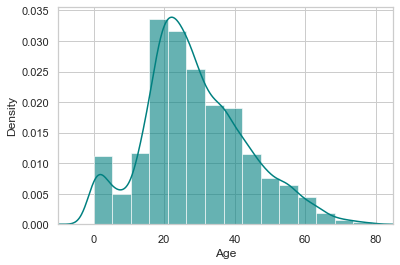

In [15]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values. 

In [16]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 28.83
The median of "Age" is 27.00


<a id="t2.2."></a>
## 2.2. Cabin - Missing Values

In [17]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 2.29%


Only 2,29 of records are missing, which let us to use this column as valid variable in regression analysis. These value will not be artificially updated because it is interesting would the cabin possition was important in survival rate in Spaceship travel.

<a id="t2.3."></a>
## 2.3. Home planet - Missing Values

In [18]:
# percent of missing "HomePlanet" 
print('Percent of missing "Homet Planet" records is %.2f%%' %((train_df['HomePlanet'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Homet Planet" records is 2.31%


There are  201 (2.31%) missing values for "HomePlanet", so we can just input with the HomePlanet where most people boarded in missing values date sets.

Boarded passengers grouped by port of home planet (green = Europe, Orange = Earth, Blue = Mars):
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


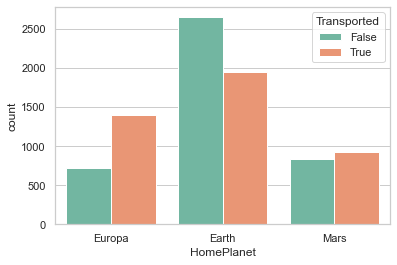

In [19]:
print('Boarded passengers grouped by port of home planet (green = Europe, Orange = Earth, Blue = Mars):')
print(train_df['HomePlanet'].value_counts())
sns.countplot(x='HomePlanet', hue='Transported', data=train_df, palette='Set2')
plt.show()

<a id="t2.3."></a>
## 2.4. Destination - Missing Values

In [20]:
# percent of missing "HomePlanet" 
print('Percent of missing "Destination" records is %.2f%%' %((train_df['Destination'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Destination" records is 2.09%


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


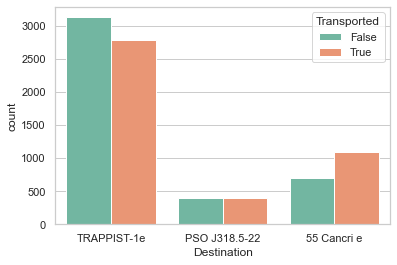

In [21]:
print(train_df['Destination'].value_counts())
sns.countplot(x='Destination', hue='Transported', data=train_df, palette='Set2')
plt.show()

There are 182 (2.09%) missing values for "Destination", so we can just input with the Destination where most people where travelling to missing values data sets ehich was TRAPPIST-1e

In [22]:
# print('The most common boarding port of embarkation is %s.' %train_df['HomePlanet'].value_counts().idxmax())

False    8291
True      199
Name: VIP, dtype: int64


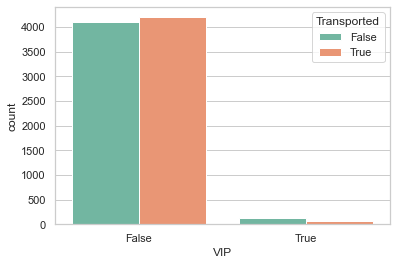

In [23]:
print(train_df['VIP'].value_counts())
sns.countplot(x='VIP', hue='Transported', data=train_df, palette='Set2')
plt.show()

In [24]:
# percent of missing "HomePlanet" 
print('Percent of missing "VIP" records is %.2f%%' %((train_df['VIP'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "VIP" records is 2.34%


* By far the most passengers boarded in Earth, so we'll impute those 201 NaN's w/ "Earth" in following steps.
* Most passengers going to TRAPPISTE-1e, which will be used to fill up missing 182 NaN's in Destination column in following steps.
* Most passengers did not have VIP status, so VIP 203 NaN's will be filled up with most common value.

<a id="t2.4."></a>
## 2.4. Final Adjustments to Data (Train)

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:
* If "Age" is missing for a given row, I'll impute with 27 (median age).
* If "HomePlanet" is missing for a riven row, I'll impute with "Earth" (the most common boarding HomePlanet).
* I'll ignore changing "Cabin" as a variable because it can be useful determining if cabins class had impact on Transported status in the SpaceShip.

In [25]:
#Adjustments on Train dataset based on above analysis (creating a copy of train_df -- calling it train_data and doing adjutment on train_data for further analysis)
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["HomePlanet"].fillna(train_df['HomePlanet'].value_counts().idxmax(), inplace=True)
train_data["Destination"].fillna(train_df['Destination'].value_counts().idxmax(), inplace=True)
train_data["VIP"].fillna(train_df['VIP'].value_counts().idxmax(), inplace=True)

In [26]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [27]:
# preview adjusted train data
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


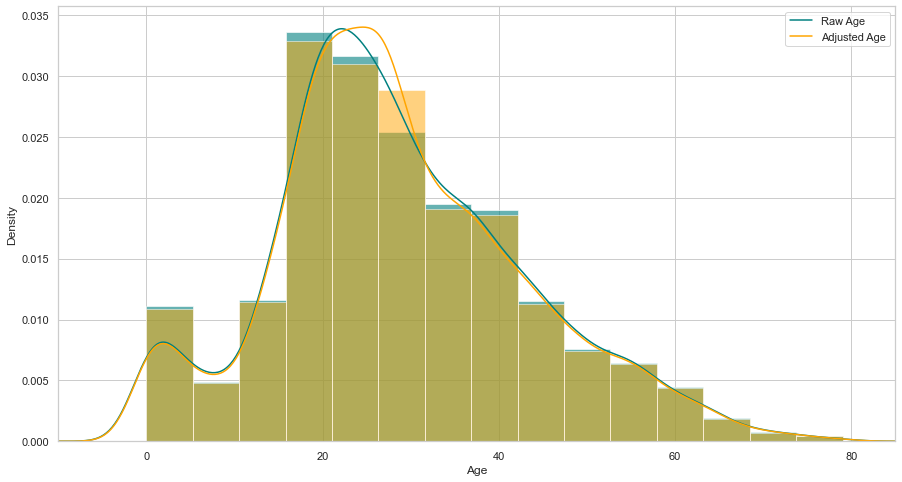

In [28]:
# Checking Train_data Age adjustemetns compared to initial Train_df
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [29]:
train_df.shape

(8693, 14)

In [30]:
train_data_no_na=train_data.dropna()
train_data_no_na.shape

(7248, 14)

In [31]:
print(train_data_no_na.shape[0]/train_df.shape[0]*100)

83.37743011618544


Because adding median Age numbers and most common HomePlanet helped to lower data loss to 17 % and train_data will be used in following analysis as  after cleaning remaining na values

In [32]:
#Data adter clearing na's
train_data=train_data.dropna()
train_data.shape

(7248, 14)

In [33]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
#Verifying that no null remaining in the train_data dataset
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

<a id="t2.4.1."></a>
## 2.4.1. Additional Variables

As many columns represent amounts of money spend during the travel (RoomService,FoodCourt, ShoppingMall, Spa, VRDeck) additional columns calculating TotalExpenditure is created.

In [35]:
## Create categorical variable for total expenditure
train_data['TotalExpenditure']=train_data['RoomService']+train_data['FoodCourt']+train_data['ShoppingMall']+train_data['Spa']+train_data['VRDeck']
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [36]:
# ## Droping the other columns representing money spent
# train_data.drop('RoomService', axis=1, inplace=True)
# train_data.drop('FoodCourt', axis=1, inplace=True)
# train_data.drop('ShoppingMall', axis=1, inplace=True)
# train_data.drop('Spa', axis=1, inplace=True)
# train_data.drop('VRDeck', axis=1, inplace=True)
# train_data

In [37]:
##Checking how many unique "Cabin" ids exist in the dataset o find out how they are coded
train_data.groupby(by='Cabin').count()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure
Cabin,,,,,,,,,,,,,,
A/0/P,2,2,2,2,2,2,2,2,2,2,2,2,2,2
A/0/S,2,2,2,2,2,2,2,2,2,2,2,2,2,2
A/1/S,3,3,3,3,3,3,3,3,3,3,3,3,3,3
A/10/P,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A/10/S,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G/999/P,2,2,2,2,2,2,2,2,2,2,2,2,2,2
G/999/S,2,2,2,2,2,2,2,2,2,2,2,2,2,2
T/0/P,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Because Cabin column has more that 5000 unique values, parcing the cabin to get cabin class doing assumption that first letter of the code represents cabin class.

In [38]:
#Creating Cabin class column
train_data['Cabin_class'] = train_data['Cabin'].str[0]
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure,Cabin_class
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F


In [39]:
# ## Create categorical variable for traveling alone
# train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
# train_data.drop('SibSp', axis=1, inplace=True)
# train_data.drop('Parch', axis=1, inplace=True)

Create categorical variables for CryoSleep, VIP, Cabin Class ("Cabin_class"), Departure planet ("HomePlanet"), and Arrival station ("Destination"). 

In [40]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["CryoSleep","VIP", "Cabin_class","HomePlanet","Destination"])
# training.drop('Sex_female', axis=1, inplace=True)
# training.drop('PassengerId', axis=1, inplace=True)
# training.drop('Name', axis=1, inplace=True)
# training.drop('Ticket', axis=1, inplace=True)
final_train = training
final_train.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Cabin_class_E,Cabin_class_F,Cabin_class_G,Cabin_class_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0,0,0,0,0,1,0,0,0,1
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,0,1,0,0,1,0,0,0,0,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,...,0,0,0,0,0,1,0,0,0,1
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,...,0,0,0,0,0,1,0,0,0,1
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,...,0,1,0,0,1,0,0,0,0,1


In [41]:
final_train=final_train.astype({"Age": int})

In [42]:
final_train=final_train.astype({"TotalExpenditure": int})

### Now, apply the same changes to the test data. <br> -- For Kaggle competition only so not represented in the Notebook
For test data set would need to apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = 27).
<br> Applying the most common values to HomePlanet, Destination and VIP columns.

### For testing model accuracy and prediction score train data set will be split in Tain and Test. 

In [43]:
# test_df.shape

In [44]:
# test_df.isnull().sum()

In [45]:
# test_data = test_df.copy()
# test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
# test_data["HomePlanet"].fillna(train_df['HomePlanet'].value_counts().idxmax(), inplace=True)

# test_data['TotalExpenditure']=test_data['RoomService']+test_data['FoodCourt']+test_data['ShoppingMall']+test_data['Spa']+test_data['VRDeck']
# train_data

# test_data.drop('RoomService', axis=1, inplace=True)
# test_data.drop('FoodCourt', axis=1, inplace=True)
# test_data.drop('ShoppingMall', axis=1, inplace=True)
# test_data.drop('Spa', axis=1, inplace=True)
# test_data.drop('VRDeck', axis=1, inplace=True)
# test_data

# test_data['Cabin_class'] = test_data['Cabin'].str[0]

In [46]:
# test_data_no_na=test_data.dropna()
# test_data_no_na.shape

In [47]:
# test_data=test_data_no_na

In [48]:
# testing=pd.get_dummies(test_data, columns=["CryoSleep", "VIP", "Cabin_class","HomePlanet","Destination"])
# final_test = testing
# final_test.head()

<a id="t3."></a>
# 3. Exploratory Data Analysis of Training data

<a id="t3.1."></a>
## 3.1. Exploration of Age

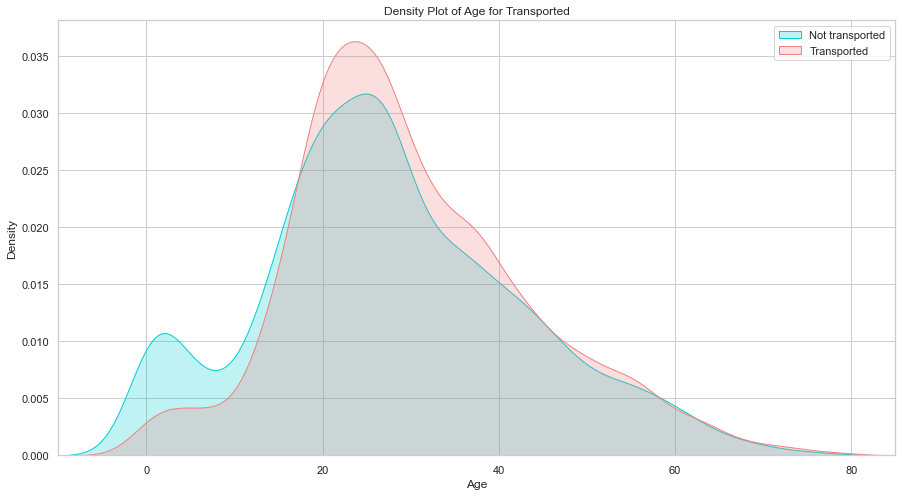

In [49]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Transported == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Transported == 0], color="lightcoral", shade=True)
plt.legend(['Not transported', 'Transported'])
plt.title('Density Plot of Age for Transported')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distribution for Transported and not is actually very similar.  One notable difference is that, of the survivors, a larger proportion were children.  It is hard to understand what dependency it had in SpaceShip travel.

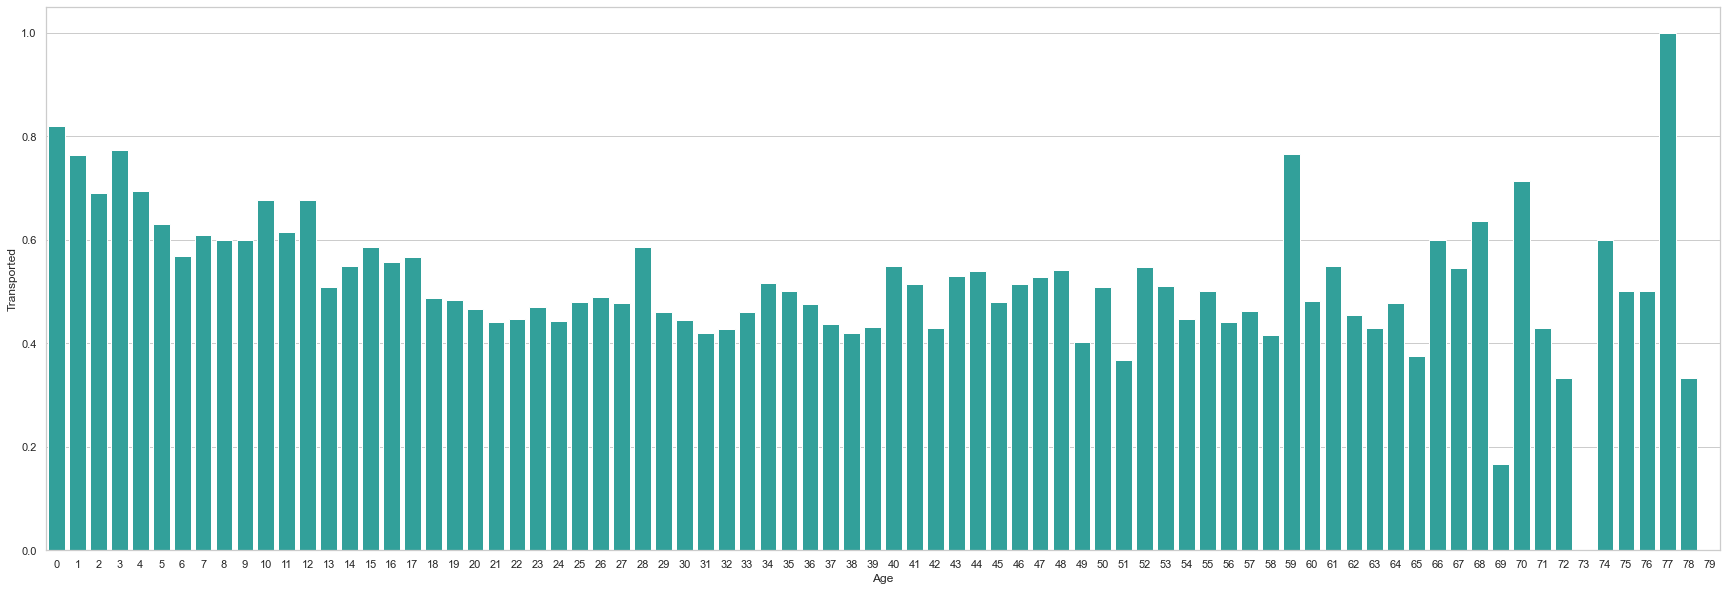

In [50]:
plt.figure(figsize=(30,10))
avg_transported_byage = final_train[["Age", "Transported"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Transported', data=avg_transported_byage, color="LightSeaGreen")
plt.show()

Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [51]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)
# final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

<a id="t3.2."></a>
## 3.2. Exploration of Fare

In [52]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7248 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7248 non-null   object 
 1   Cabin                      7248 non-null   object 
 2   Age                        7248 non-null   int64  
 3   RoomService                7248 non-null   float64
 4   FoodCourt                  7248 non-null   float64
 5   ShoppingMall               7248 non-null   float64
 6   Spa                        7248 non-null   float64
 7   VRDeck                     7248 non-null   float64
 8   Name                       7248 non-null   object 
 9   Transported                7248 non-null   bool   
 10  TotalExpenditure           7248 non-null   int64  
 11  CryoSleep_False            7248 non-null   uint8  
 12  CryoSleep_True             7248 non-null   uint8  
 13  VIP_False                  7248 non-null   uint8

In [53]:
final_train.shape[0]

7248

In [54]:
final_train.groupby(['TotalExpenditure']).count()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Cabin_class_F,Cabin_class_G,Cabin_class_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,IsMinor
TotalExpenditure,,,,,,,,,,,,,,,,,,,,,
0,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,...,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008
336,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
394,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
395,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
397,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29608,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
30478,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
31074,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Total expenditure 0 is representing around 40% of data

In [55]:
(final_train["TotalExpenditure"].value_counts())/final_train.shape[0]

0       0.415011
809     0.006760
804     0.004829
788     0.004691
803     0.004415
          ...   
2342    0.000138
2981    0.000138
2261    0.000138
3062    0.000138
4637    0.000138
Name: TotalExpenditure, Length: 2012, dtype: float64

In [56]:
# sns.countplot(x='Transported', hue='TotalExpenditure',data=final_train, palette='Set2')
# plt.show()

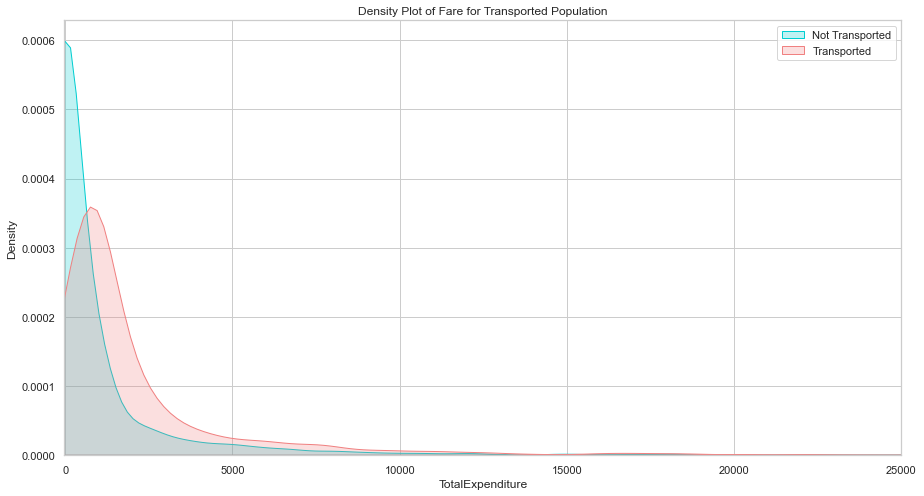

In [57]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["TotalExpenditure"][final_train.Transported == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["TotalExpenditure"][final_train.Transported == 0], color="lightcoral", shade=True)
plt.legend(['Not Transported', 'Transported'])
plt.title('Density Plot of Fare for Transported Population')
ax.set(xlabel='TotalExpenditure')
plt.xlim(-20,25000)
plt.show()

Looking to this  likely not transport the ones who didint have additional expenditure, but this is not very informative because around 40% of the passengers didnt have any expenditure on the SpaceShip.

<a id="t3.3."></a>
## 3.3. Exploration of Passenger Class

In [58]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7248 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7248 non-null   object 
 1   Cabin                      7248 non-null   object 
 2   Age                        7248 non-null   int64  
 3   RoomService                7248 non-null   float64
 4   FoodCourt                  7248 non-null   float64
 5   ShoppingMall               7248 non-null   float64
 6   Spa                        7248 non-null   float64
 7   VRDeck                     7248 non-null   float64
 8   Name                       7248 non-null   object 
 9   Transported                7248 non-null   bool   
 10  TotalExpenditure           7248 non-null   int64  
 11  CryoSleep_False            7248 non-null   uint8  
 12  CryoSleep_True             7248 non-null   uint8  
 13  VIP_False                  7248 non-null   uint8

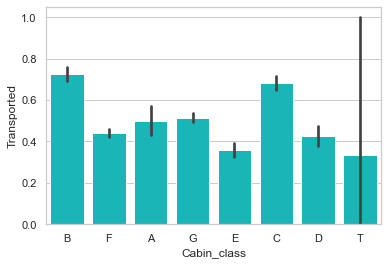

In [59]:
sns.barplot('Cabin_class', 'Transported', data=train_data, color="darkturquoise")
plt.show()

Being in A, B, C, G was safest.

<a id="t3.4."></a>
## 3.4. Exploration of  Home Planet

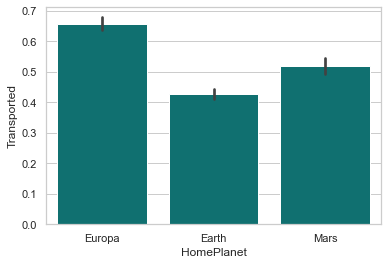

In [60]:
sns.barplot('HomePlanet', 'Transported', data=train_data, color="teal")
plt.show()

In [61]:
# Passengers who boarded in Cherbourg, France, appear to have the highest survival rate.  Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown.  This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck). <br> It's also worth noting the size of the whiskers in these plots.  Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest.  The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker.  It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

<a id="t3.5."></a>
## 3.5. Exploration  VIP

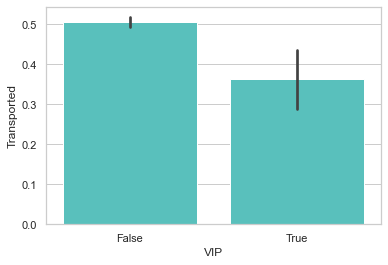

In [62]:
sns.barplot('VIP', 'Transported', data=train_data,color="mediumturquoise")
plt.show()

<a id="t3.6."></a>
## 3.6. Exploration of CryoSleep

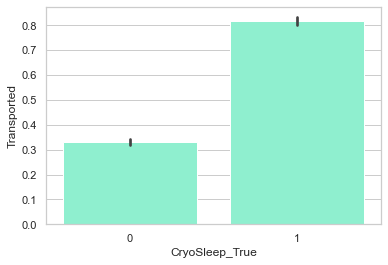

In [63]:
sns.barplot('CryoSleep_True', 'Transported', data=final_train, color="aquamarine")
plt.show()

Cryo sleep greatly increased your chances of survival.

<a id="t4."></a>
# 4. Logistic Regression and Results

<a id="t4.1."></a>
## 4.1. Feature selection

<a id="t4.1.1."></a>
### 4.1.1. Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_ attribute` or through a `feature_importances_` attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

References: <br>
http://scikit-learn.org/stable/modules/feature_selection.html <br>

In [64]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7248 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7248 non-null   object 
 1   Cabin                      7248 non-null   object 
 2   Age                        7248 non-null   int64  
 3   RoomService                7248 non-null   float64
 4   FoodCourt                  7248 non-null   float64
 5   ShoppingMall               7248 non-null   float64
 6   Spa                        7248 non-null   float64
 7   VRDeck                     7248 non-null   float64
 8   Name                       7248 non-null   object 
 9   Transported                7248 non-null   bool   
 10  TotalExpenditure           7248 non-null   int64  
 11  CryoSleep_False            7248 non-null   uint8  
 12  CryoSleep_True             7248 non-null   uint8  
 13  VIP_False                  7248 non-null   uint8

In [65]:
## Change CyroSleep and VIP values to numerical
# df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
# print(df)
# final_train['CryoSleep_new']=final_train['CryoSleep'].replace({'True':1, 'False':0}, inplace=True)
# final_train

In [66]:
## Exporting data prepared for statistical analysis
final_train.to_csv("final_train.csv", index=False)

In [67]:
# Read CSV final_train data file into DataFrame
final_train = pd.read_csv("final_train.csv")
final_train

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Cabin_class_F,Cabin_class_G,Cabin_class_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,IsMinor
0,0001_01,B/0/P,39,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0,0,0,0,1,0,0,0,1,0
1,0002_01,F/0/S,24,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,1,0,0,1,0,0,0,0,1,0
2,0003_01,A/0/S,58,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,...,0,0,0,0,1,0,0,0,1,0
3,0003_02,A/0/S,33,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,...,0,0,0,0,1,0,0,0,1,0
4,0004_01,F/1/S,16,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,...,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9276_01,A/98/P,41,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,...,0,0,0,0,1,0,1,0,0,0
7244,9278_01,G/1499/S,18,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,...,0,1,0,1,0,0,0,1,0,0
7245,9279_01,G/1500/S,26,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,...,0,1,0,1,0,0,0,0,1,0
7246,9280_01,E/608/S,32,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,...,0,0,0,0,1,0,1,0,0,0


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["CryoSleep_False", "CryoSleep_True", "Age","TotalExpenditure","VIP_False", "VIP_True","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e", "IsMinor"] 
X = final_train[cols]
y = final_train['Transported']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, n_features_to_select=20)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['CryoSleep_False', 'CryoSleep_True', 'Age', 'VIP_False', 'VIP_True', 'Cabin_class_A', 'Cabin_class_B', 'Cabin_class_C', 'Cabin_class_D', 'Cabin_class_E', 'Cabin_class_F', 'Cabin_class_G', 'Cabin_class_T', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'IsMinor']


<a id="t4.1.2."></a>
### 4.1.2. Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 21
Selected features: ['CryoSleep_False', 'CryoSleep_True', 'Age', 'TotalExpenditure', 'VIP_False', 'VIP_True', 'Cabin_class_A', 'Cabin_class_B', 'Cabin_class_C', 'Cabin_class_D', 'Cabin_class_E', 'Cabin_class_F', 'Cabin_class_G', 'Cabin_class_T', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'IsMinor']


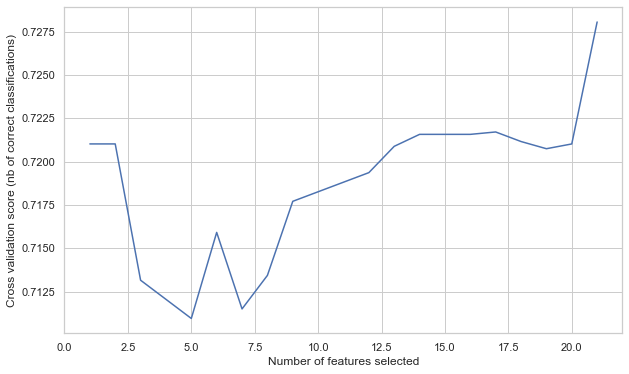

In [69]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

As we see, 21 variables were kept. 

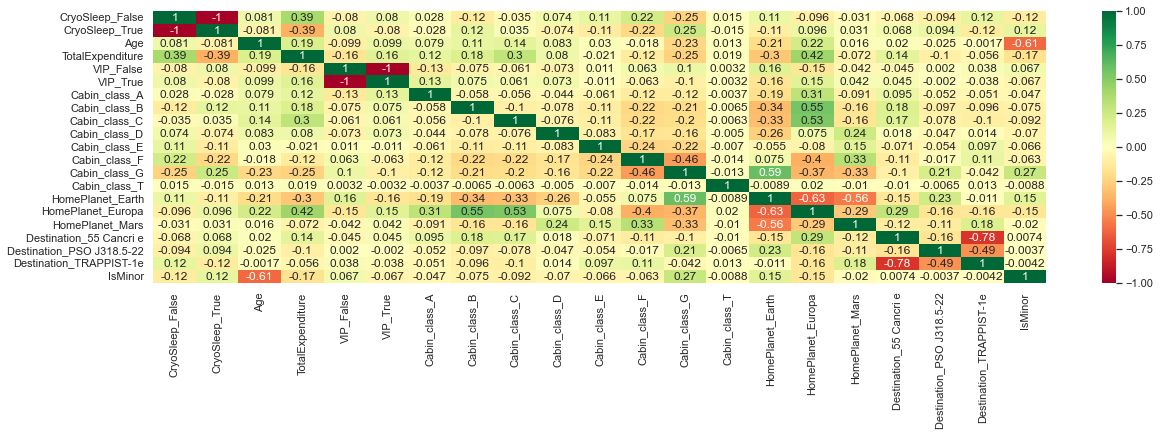

In [70]:
Selected_features = ["CryoSleep_False", "CryoSleep_True", "Age","TotalExpenditure","VIP_False", "VIP_True","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e", "IsMinor"]
X = final_train[Selected_features]

plt.subplots(figsize=(20, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Because of high correlation in between CryoSleep and VIP false and positive column removing False columns.

In [71]:
Selected_features = ["CryoSleep_True", "Age","TotalExpenditure","VIP_True","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e", "IsMinor"]

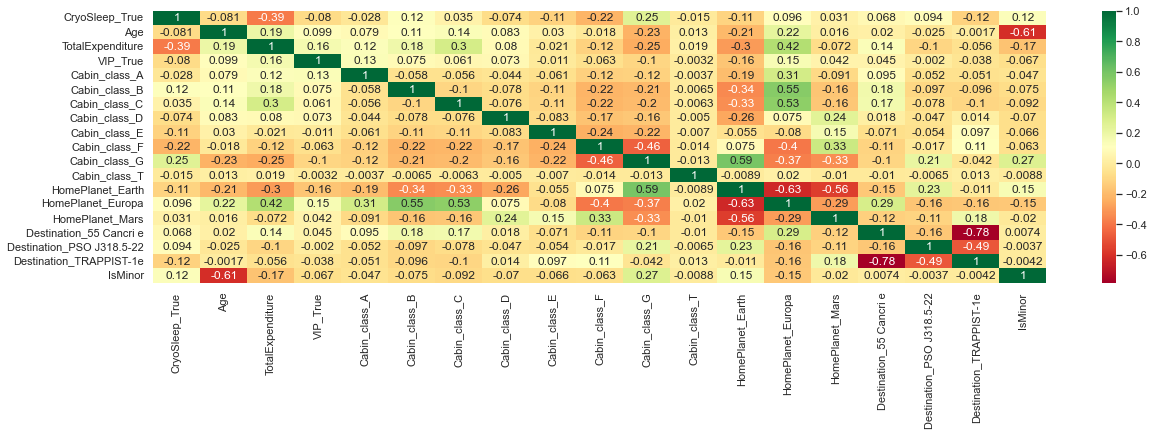

In [72]:
X = final_train[Selected_features]

plt.subplots(figsize=(20, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Because of high correlation in between Minnor and Age Minnor column is removed from train_data dataset.

In [73]:
Selected_features = ["CryoSleep_True", "Age","TotalExpenditure","VIP_True","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]

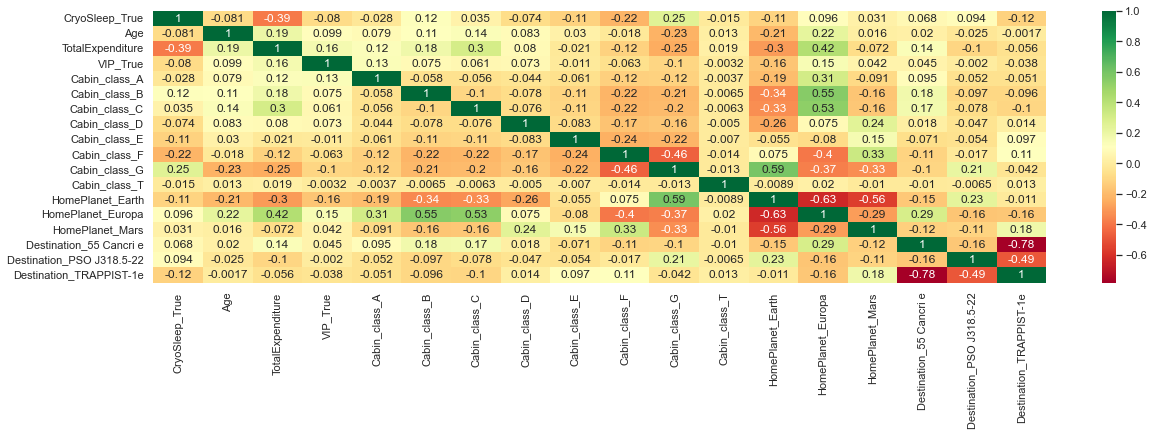

In [74]:
X = final_train[Selected_features]

plt.subplots(figsize=(20, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [75]:
Selected_features = ["CryoSleep_True", "Age","TotalExpenditure","VIP_True","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]

## After testing multicorrelation of the variables 
in the model few variables are removed from the dataset to improve model prediction score

In [76]:
final_train=final_train.drop(columns=['CryoSleep_False', 'VIP_False', 'IsMinor'])

In [77]:
## Rename columns
final_train.rename(columns={'CryoSleep_True':'CryoSleep', 'VIP_True':'VIP'}, inplace=True)
final_train

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Cabin_class_E,Cabin_class_F,Cabin_class_G,Cabin_class_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,B/0/P,39,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0,0,0,0,0,1,0,0,0,1
1,0002_01,F/0/S,24,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,0,1,0,0,1,0,0,0,0,1
2,0003_01,A/0/S,58,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,...,0,0,0,0,0,1,0,0,0,1
3,0003_02,A/0/S,33,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,...,0,0,0,0,0,1,0,0,0,1
4,0004_01,F/1/S,16,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9276_01,A/98/P,41,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,...,0,0,0,0,0,1,0,1,0,0
7244,9278_01,G/1499/S,18,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,...,0,0,1,0,1,0,0,0,1,0
7245,9279_01,G/1500/S,26,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,...,0,0,1,0,1,0,0,0,0,1
7246,9280_01,E/608/S,32,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,...,1,0,0,0,0,1,0,1,0,0


In [78]:
## Exporting data prepared for further statistical analysis and model deployment in PyCharm
final_train.to_csv("final_train.csv", index=False)

<a id="t4.2."></a>
## 4.2. Review of model evaluation procedures

Motivation: Need a way to choose between machine learning models
* Goal is to estimate likely performance of a model on out-of-sample data

Initial idea: Train and test on the same data
* But, maximizing training accuracy rewards overly complex models which overfit the training data

Alternative idea: Train/test split
* Split the dataset into two pieces, so that the model can be trained and tested on different data
* Testing accuracy is a better estimate than training accuracy of out-of-sample performance
* Problem with train/test split
    * It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
    * Testing accuracy can change a lot depending on a which observation happen to be in the testing set

Reference: <br>
http://www.ritchieng.com/machine-learning-cross-validation/ <br>

<a id="t4.2.1."></a>
### 4.2.1. Model evaluation based on simple train/test split using `train_test_split()` function (FINAL Train model spliting in train and test)

In [79]:
Selected_features = ["CryoSleep", "Age","TotalExpenditure","VIP","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]

Train/Test split results:
LogisticRegression accuracy is 0.739
LogisticRegression log_loss is 0.532
LogisticRegression auc is 0.794


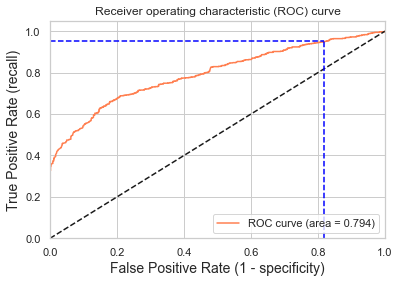

Using a threshold of 0.237 guarantees a sensitivity of 0.950 and a specificity of 0.182, i.e. a false positive rate of 81.79%.


In [80]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Transported']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

<a id="t4.2.2."></a>
### 4.2.1.1 Model evaluation based on KNeighborsClassifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,metric="minkowski")
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
accuracy_score(knn_pred,y_test)

0.7193103448275862

<a id="t4.2.2."></a>
### 4.2.1.2 Model evaluation based on RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RFC_clf = RandomForestClassifier(max_depth=2, random_state=0)
RFC_clf.fit(X, y)

y_pred = RFC_clf.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='micro'))

[False False  True ...  True False  True]
[[596 129]
 [237 488]]
0.7475862068965519


<a id="t4.2.2."></a>
### 4.2.2. Model evaluation based on K-fold cross-validation using `cross_val_score()` function 

In [83]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.727
LogisticRegression average log_loss is 0.550
LogisticRegression average auc is 0.776


<a id="t4.2.3."></a>
### 4.2.3. Model evaluation based on K-fold cross-validation using `cross_validate()` function 

In [84]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression(max_iter=10000000)

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.726 (+/-0.012)
LogisticRegression average log_loss: 0.550 (+/-0.015)
LogisticRegression average auc: 0.777 (+/-0.019)


## <font color=blue> What happens when we add the separate expenditures columns instead of TotalExpenditure"?<font>

In [85]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7248 non-null   object 
 1   Cabin                      7248 non-null   object 
 2   Age                        7248 non-null   int64  
 3   RoomService                7248 non-null   float64
 4   FoodCourt                  7248 non-null   float64
 5   ShoppingMall               7248 non-null   float64
 6   Spa                        7248 non-null   float64
 7   VRDeck                     7248 non-null   float64
 8   Name                       7248 non-null   object 
 9   Transported                7248 non-null   bool   
 10  TotalExpenditure           7248 non-null   int64  
 11  CryoSleep                  7248 non-null   int64  
 12  VIP                        7248 non-null   int64  
 13  Cabin_class_A              7248 non-null   int64

In [86]:
cols = ["CryoSleep", "RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Age","VIP","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression(max_iter=10000000)

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.792 (+/-0.013)
LogisticRegression average log_loss: 0.438 (+/-0.024)
LogisticRegression average auc: 0.878 (+/-0.014)


 <font color=red>We notice that the model is slightly improved. The deparate variables for expendirure  does  carry  useful information. Its presence make model more precise.

## <font color=blue> What happens when removing the most correlating Departure planets and destination planets which has the least values in the train dataset?<font>

In [87]:
cols = ["CryoSleep", "RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Age","VIP","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.790 (+/-0.010)
LogisticRegression average log_loss: 0.441 (+/-0.024)
LogisticRegression average auc: 0.877 (+/-0.015)


<a id="t4.3."></a>
## 4.3.1 GridSearchCV evaluating using multiple scorers simultaneously (with TotalExpenditure)

best params: LogisticRegression(C=1.7000100000000002)
best params: {'C': 1.7000100000000002}
best score: 0.7282057534768527


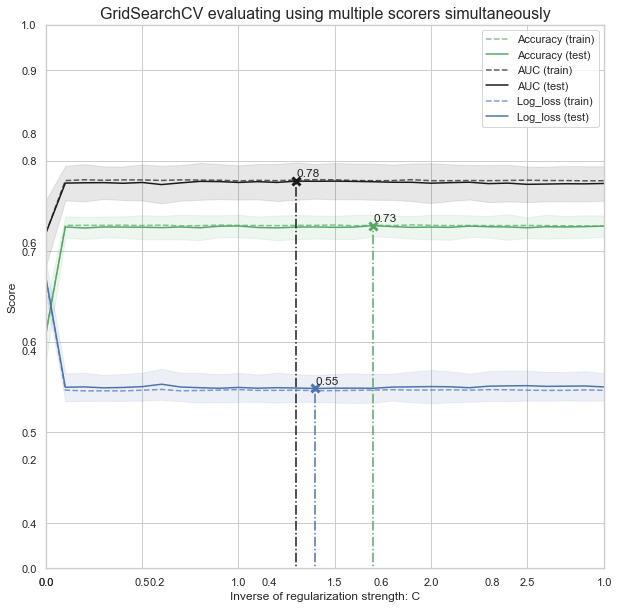

In [88]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

<a id="t4.3."></a>
## 4.3.2 GridSearchCV evaluating using multiple scorers simultaneously (with separate Expenditure)

best params: LogisticRegression(C=2.2000100000000002)
best params: {'C': 2.2000100000000002}
best score: 0.7911160220994475


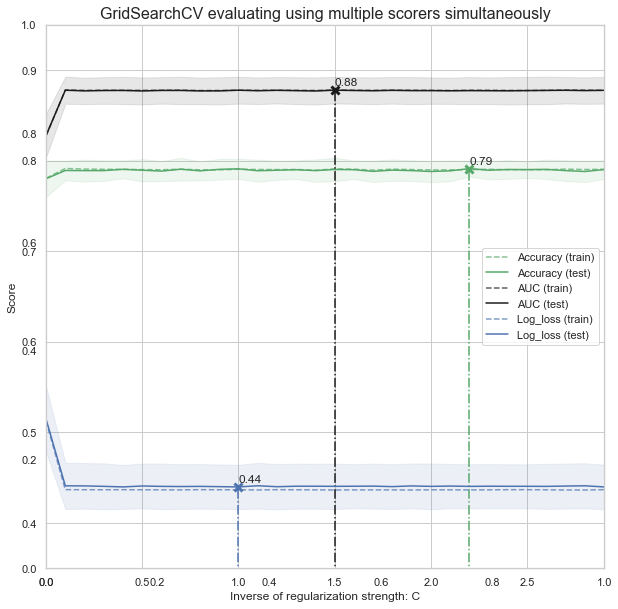

In [89]:
from sklearn.model_selection import GridSearchCV

Selected_features = ["CryoSleep", "RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Age","VIP","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
       "HomePlanet_Earth","HomePlanet_Europa","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

<a id="t4.4."></a>
## 4.4. GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

We can applied many tasks together for more in-depth evaluation like gridsearch using cross-validation based on k-folds repeated many times, that can be scaled or no with respect to many scorers and tunning on parameter for a given estimator!  

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=4.00001))])
best params: {'clf__C': 4.00001}
best score: 0.7900106898931487


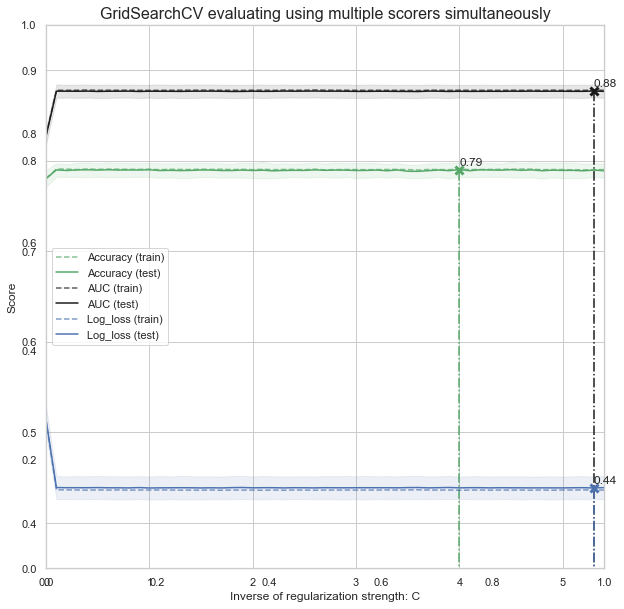

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [91]:
# final_test.isnull().sum()

In [92]:
# import os
# os.getcwd()

In [93]:
# Selected_features = ["CryoSleep", "Age","TotalExpenditure","VIP","Cabin_class_A","Cabin_class_B","Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
#        "HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]

In [94]:
# final_test['Transported_prediction'] = log_clf.predict(final_test[Selected_features])
# final_test['PassengerId'] = test_df['PassengerId']
# final_test['Actual_transported']=train_df['Transported']

# prediction_results = final_test[['PassengerId','Transported_prediction','Actual_transported']]
# prediction_results.to_csv("prediction_results_final_test.csv", index=False)
# prediction_results.info()

In [95]:
desired_width = 320
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns',30)

In [96]:
cols = ["Age","RoomService","FoodCourt", "ShoppingMall","Spa", "VRDeck","CryoSleep", "Cabin_class_A","Cabin_class_B",
        "Cabin_class_C","Cabin_class_D","Cabin_class_E","Cabin_class_F","Cabin_class_G","Cabin_class_T",
        "HomePlanet_Earth", "HomePlanet_Europa",
        "Destination_PSO J318.5-22", "Destination_TRAPPIST-1e", "VIP"]
X = final_train[cols]
y = final_train['Transported']
# Build a logreg and compute the feature importances

# Select independent and dependent variable
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

# Adding LogisticRegression() model
model = LogisticRegression(max_iter=10000000)
# create the RFE model and select 20 attributes
rfe = RFE(model, n_features_to_select=19)
lr_rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))
score = lr_rfe.score(X_test, y_test)
print(score)

Selected features: ['Age', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'Cabin_class_A', 'Cabin_class_B', 'Cabin_class_C', 'Cabin_class_D', 'Cabin_class_E', 'Cabin_class_F', 'Cabin_class_G', 'Cabin_class_T', 'HomePlanet_Earth', 'HomePlanet_Europa', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP']
0.7941501103752759


In [97]:
#LogisticRegression confution_matrix and f1 scores
y_pred = lr_rfe.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='micro'))

[ True  True False ... False  True  True]
[[714 200]
 [173 725]]
0.7941501103752759


In [98]:
final_train['Transported_prediction'] = log_clf.predict(final_train[Selected_features])
final_train['Actual_transported']=final_train['Transported']
final_train

prediction_results = final_train[['PassengerId','Transported_prediction','Actual_transported']]
prediction_results.to_csv("prediction_results_final_train.csv", index=False)
prediction_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PassengerId             7248 non-null   object
 1   Transported_prediction  7248 non-null   bool  
 2   Actual_transported      7248 non-null   bool  
dtypes: bool(2), object(1)
memory usage: 70.9+ KB


In [99]:
# final_test[final_test["Age"]==59.0].sort_values(by=["Actual_transported"], ascending=False)
# final_train[(final_train["Age"]==79) & (final_train["TotalExpenditure"]==657)].sort_values(by=["Actual_transported"], ascending=False)

In [100]:
# final_train

In [101]:
# #Checking prediction score on the actual dataset
# final_train["Predicted_transported_value"]=log_clf.predict(final_train[Selected_features])
# final_train

In [102]:
# #Applying model to predict value on test data split and comparing with actual data
# X_test['Transported_prediction'] = log_clf.predict(X_testc)
# X_test['Actual_transported']=y_test
# X_test

# prediction_results = X_test[['PassengerId','Transported_prediction','Actual_transported']]
# # prediction_results.to_csv("Test_prediction_results.csv", index=False)
# # prediction_results.tail()